In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('ModeChoiceOptima.txt', sep="\t", header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,107,108,109,110,111,112,113,114,115,116
0,ID,DestAct,NbTransf,TimePT,WalkingTimePT,WaitingTimePT,CostPT,CostCar,TimeCar,NbHousehold,...,FreqTripHouseh,Region,distance_km,Choice,InVehicleTime,ModeToSchool,ReportedDuration,CoderegionCAR,age,Weight
1,10350017,2,4,85,23,10,12.4,3.17,32,2,...,4,1,30,1,52,3,255,1,27,0.000378621
2,10350020,1,4,108,26,16,12.4,3.28,30,2,...,4,1,32,-1,66,3,150,1,28,0.000340556
3,10350025,11,2,82,33,5,3,0.45,6,-1,...,2,1,4.5,0,44,-1,20,1,-1,0.000367986
4,10350075,1,3,107,21,31,24,2.36,23,2,...,1,1,25,1,55,-1,30,1,63,0.000367986


In [87]:
#data.describe()
# Renaming correctly the columns of pandas data
columnsID = data.columns
featureNames = data.iloc[0, :]
NameDictionary = dict(zip(columnsID, featureNames))
data.rename(columns = NameDictionary, inplace = True)
data.drop(index=data.index[0], axis=0, inplace=True)
data.drop((data[data.Choice == '-1']).index, inplace=True)
data.drop((data[data.Choice == '-2']).index, inplace=True)
data.drop((data[data.Choice == '2']).index, inplace=True)
data.head()

,ID,DestAct,NbTransf,TimePT,WalkingTimePT,WaitingTimePT,CostPT,CostCar,TimeCar,NbHousehold,...,FreqTripHouseh,Region,distance_km,Choice,InVehicleTime,ModeToSchool,ReportedDuration,CoderegionCAR,age,Weight
1,10350017,2,4,85,23,10,12.4,3.17,32,2,...,4,1,30,1,52,3,255,1,27,0.000378621
3,10350025,11,2,82,33,5,3,0.45,6,-1,...,2,1,4.5,0,44,-1,20,1,-1,0.000367986
4,10350075,1,3,107,21,31,24,2.36,23,2,...,1,1,25,1,55,-1,30,1,63,0.000367986
5,10350085,1,5,190,116,18,10.8,1.16,14,3,...,3,1,12.5,1,56,-1,20,1,57,0.000409116
6,10350086,1,4,116,38,29,9.6,1.89,20,3,...,3,1,19,1,49,-1,30,1,58,0.000367986


In [88]:
regions = {1:'Vaud', 2:'Valais', 3:'Delemont', 4:'Bern', 5:'Basel, Aargau, Olten', 6:'Zurich', 7:'Eastern Switzerland', 8:'Graubunden'}

def RegionGraph (featName, dat, exclusions):
    if isinstance(featName, str) and all(isinstance(item, int) for item in exclusions):

        stdOutput = np.zeros(8)
        meanOutput = np.zeros(8)
        for i in range(1, 9):
            regID = str(i)
            # Create dataset grouped by region
            RegionData = dat.loc[dat['CoderegionCAR'] == regID]
            # Isolate the specified column/feature
            FeatArr = np.array(RegionData[featName])
            # convert to floats
            intFeat = np.array([float(numero) for numero in FeatArr])
            #print(type(intEdu))
            #print(len(intEdu))
            # delete data that we want to be excluded
            for value in exclusions:
                intFeat = np.delete(intFeat, np.where(intFeat == value)[0])
            #cleanFeat = np.delete(intEdu, np.where(intEdu == -1)[0])
            #cleanFeat = np.delete(cleanEdu, np.where(cleanEdu == -2)[0])
            #print(len(cleanEdu))
            meanOutput[i - 1] = intFeat.mean()
            stdOutput[i - 1] = np.std(intFeat)
        return meanOutput, stdOutput
    else:
        print('"featName" should be a string! It is of type {}', type(featName))
        print('"exclusions" should be a list of integers! It is of type {}', type(exlusions))
        return None

def UrbRurGraph (featName, dat, exclusions):
    if isinstance(featName, str) and all(isinstance(item, int) for item in exclusions):

        stdOutput = np.zeros(2)
        meanOutput = np.zeros(2)
        for i in range(1, 3):
            regID = str(i)
            # Create dataset grouped by region
            RegionData = dat.loc[dat['UrbRur'] == regID]
            # Isolate the specified column/feature
            FeatArr = np.array(RegionData[featName])
            # convert to integers
            intFeat = np.array([float(numero) for numero in FeatArr])
            #print(type(intEdu))
            #print(len(intEdu))
            # delete data that we want to be excluded
            for value in exclusions:
                intFeat = np.delete(intFeat, np.where(intFeat == value)[0])
            #cleanFeat = np.delete(intEdu, np.where(intEdu == -1)[0])
            #cleanFeat = np.delete(cleanEdu, np.where(cleanEdu == -2)[0])
            #print(len(cleanEdu))
            meanOutput[i - 1] = intFeat.mean()
            stdOutput[i - 1] = np.std(intFeat)
        return meanOutput, stdOutput
    else:
        print('"featName" should be a string! It is of type {}', type(featName))
        print('"exclusions" should be a list of integers! It is of type {}', type(exlusions))
        return None

In [ ]:
# Adding speed metric

# Avoid division by zero
data["TimePT"] = data["TimePT"].replace(0, np.nan)
data["TimeCar"] = data["TimeCar"].replace(0, np.nan)

data["SpeedPT"] = data["distance_km"].astype(float) / data["TimePT"].astype(float)
data["SpeedCar"] = data["distance_km"].astype(float) / data["TimeCar"].astype(float)

# Remove any resulting infinities or NaNs
data = data.replace([np.inf, -np.inf], np.nan).dropna(subset=["SpeedPT", "SpeedCar"])

[16.0930131  20.20651042 20.18205128 18.75026455 21.34300792 19.84387464
 20.112      22.71041667]
[17.18601402 27.94181215 22.54736559 22.75179771 22.8492472  21.6050725
 30.22651504 25.30915299]


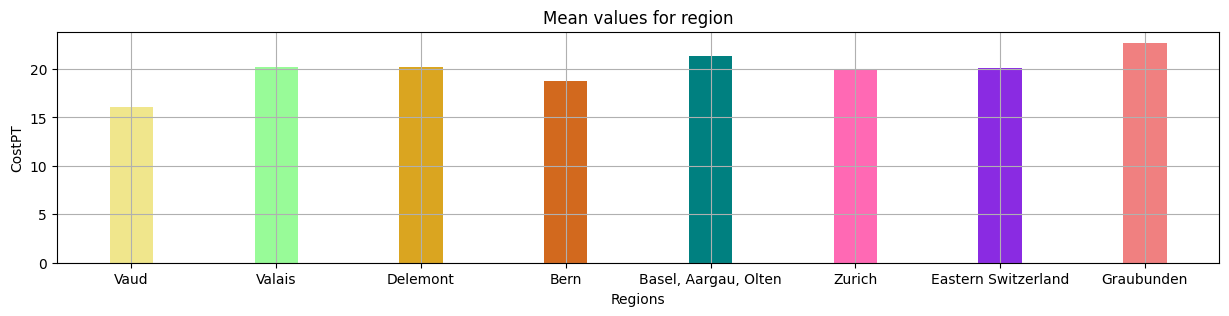

In [93]:
FeatureName = 'CostPT'
meanOut, stdOut = RegionGraph(FeatureName, data, [-1, -2])
print(meanOut)
print(stdOut)
RegColors = ['khaki', 'palegreen', 'goldenrod', 'chocolate', 'teal', 'hotpink', 'blueviolet', 'lightcoral']
plt.figure(figsize=(15,3))
plt.bar(regions.values(), meanOut, width = 0.3, align = 'center', color = RegColors)
plt.grid()
plt.title('Mean values for region')
plt.xlabel('Regions')
plt.ylabel(FeatureName)
plt.show()